In [132]:
import pandas as pd

In [133]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")


### How many different companies are represented in the data set?


In [134]:
len(set(df['Company Name']))
#or 
len(pd.unique(df['Company Name']))

439

### What is the total number of jobs created for businesses in Queens?


In [135]:
df['City'] = df['City'].str.upper()
df['City']  = df['City'].replace('QUEENS VILLAGE', "QUEENS")
df['Job created']= df['Job created'].fillna(0)
sum(df[df['City']== "QUEENS"]['Job created'])


90.0

### How many different unique email domains names are there in the data set?


In [136]:
len(pd.unique(df['company email']))

421

### Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?


In [137]:
df1 = df[df.groupby(['NTA'])['Company Name'].transform('count') > 4]
col_name = {'Total Savings':'Average Total Savings','Job created':'Total Jobs created'}
final_df = df1.groupby('NTA').agg({'Total Savings':'mean', 'Job created':'sum'}).rename(columns=col_name)


### Save your result for the previous question as a CSV file.

In [138]:
final_df.to_csv("NTA_Final_result.csv")

In [139]:
print(final_df)


                                                  Average Total Savings  \
NTA                                                                       
Battery Park City-Lower Manhattan                         469890.796667   
Bushwick South                                             26140.455000   
Carroll Gardens-Columbia Street-Red Hook                   24337.390000   
College Point                                              17159.372857   
Crown Heights North                                         4036.298889   
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill           59950.340000   
East New York                                              48433.093333   
East Williamsburg                                          13990.626364   
Greenpoint                                                  9753.649286   
Hunters Point-Sunnyside-West Maspeth                       23931.398933   
Hunts Point                                                39246.016154   
Manhattanville           

### Create a scatter plot of jobs created versus average savings.
use both a standard and a logarithmic scale for the average savings.


In [154]:
import seaborn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data

final_df['Average Total Savings_scaled']= scaler.fit_transform(final_df[['Average Total Savings']])


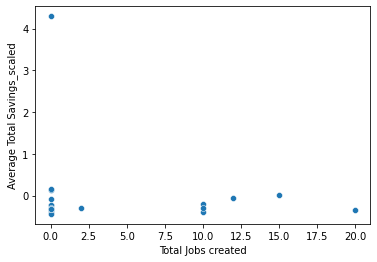

In [164]:
_=seaborn.scatterplot(x="Total Jobs created",
                    y="Average Total Savings_scaled",
                    data=final_df)

/Users/najatalrashed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


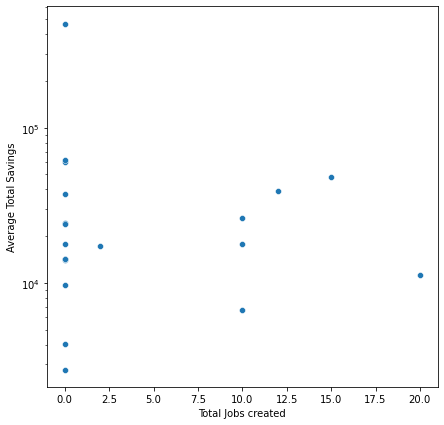

In [163]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
_=seaborn.scatterplot("Total Jobs created", "Average Total Savings", data=final_df)

### Histogram of the log of the average total savings.


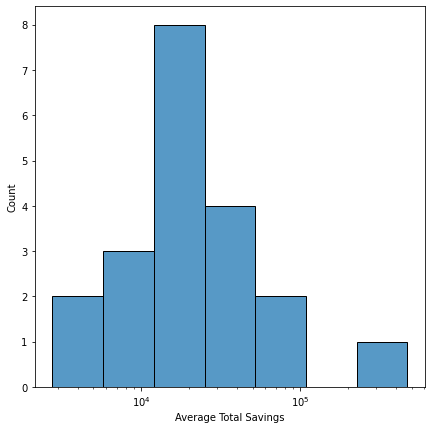

In [162]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
_=seaborn.histplot( x="Average Total Savings", data=final_df)

### Line plot of the total jobs created for each month

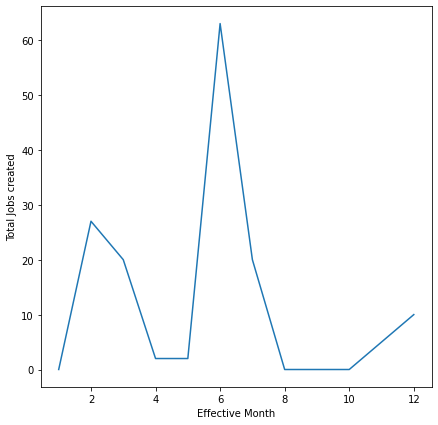

In [180]:
import datetime as dt

df['Effective Date']= pd.to_datetime(df['Effective Date'])
df['Effective Month'] = df['Effective Date'].dt.month
col_name = {'Job created':'Total Jobs created'}
df1 = df.groupby(['Effective Month']).agg({'Job created':'sum'}).rename(columns=col_name)

fig, ax = plt.subplots(figsize=(7, 7))
_=seaborn.lineplot( y="Total Jobs created", x='Effective Month' , data=df1)